In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anti-uav-yolo-1024/valid/labels/01028.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/01484.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/00588.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/00286.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/00080.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/01279.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/00440.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/02557.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/01936.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/00733.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/00134.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/01466.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/00709.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/00372.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/01850.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/02017.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/02363.txt
/kaggle/input/anti-uav-yolo-1024/valid/labels/01

In [2]:
!pip install ultralytics

import numpy as np
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import cv2
import random
import glob
import yaml
import ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.2/716.2 kB 22.2 MB/s eta 0:00:00


In [3]:
# Replace with your own dataset path
dataset_root = '/kaggle/input/anti-uav-yolo-1024'

# Class names (make sure they match your label files)
class_map = {0: 'Drone'}
classes = ['Drone']

In [4]:
def count_objects_per_class(dataset_folder):
    """Counts objects of each class in a specific dataset folder."""
    label_folder = glob.glob(os.path.join(dataset_root, dataset_folder, 'labels', '*.txt'))
    cl = []
    for anno_file in label_folder:
        with open(anno_file) as f:
            lines = [line.strip() for line in open(anno_file, 'r')]
            cl.extend([line[0][0] for line in lines])
    cl_count = {c: cl.count(c) for c in cl}
    return cl_count

In [5]:

# Count objects in train, valid, and test sets
train_counts = count_objects_per_class('train')
valid_counts = count_objects_per_class('valid')
test_counts = count_objects_per_class('test')

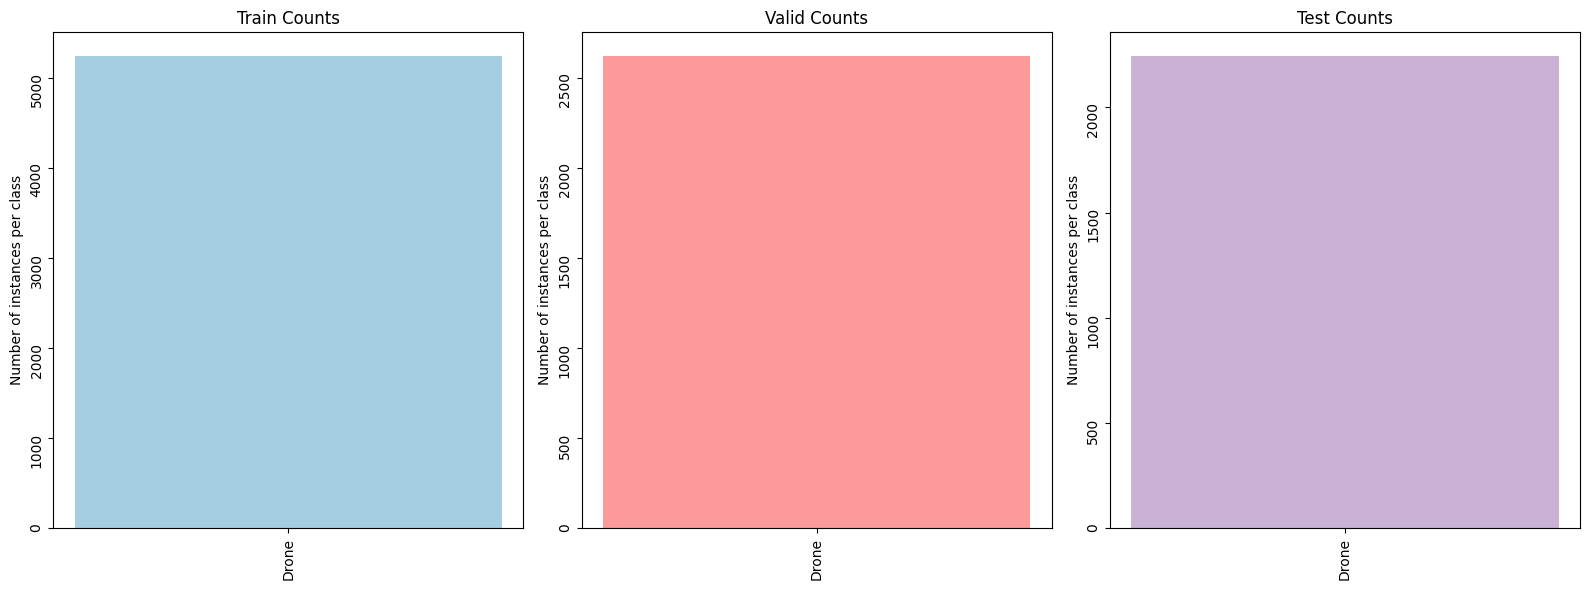

In [6]:
# Visualize object counts (modify as needed)
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
labels = ['Train', 'Validation', 'Test']

colors = plt.cm.Paired(np.arange(len(labels)) / len(labels))

for i, (data_folder, counts) in enumerate(zip(['train', 'valid', 'test'], [train_counts, valid_counts, test_counts])):
    sorted_attribute_names = sorted(list(counts.keys()))
    sorted_measurments = [counts[c] for c in sorted_attribute_names]
    x = np.arange(len(sorted_attribute_names))

    axes[i].bar(x, sorted_measurments, tick_label=[class_map[int(item)] for item in sorted_attribute_names], color=colors[i])
    axes[i].tick_params(rotation=90)
    axes[i].set_title(f'{data_folder.capitalize()} Counts')
    axes[i].set_ylabel('Number of instances per class')

plt.tight_layout()
plt.show()

In [7]:
# Install pyyaml if not already done (make sure you have internet access)
!pip install pyyaml

In [8]:
# Load YOLOv3 model
model = ultralytics.YOLO('yolov3.pt')  # Load pre-trained YOLOv3 weights


PRO TIP 💡 Replace 'model=yolov3.pt' with new 'model=yolov3u.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 198M/198M [00:00<00:00, 366MB/s] 


In [9]:
# Data configuration (compatible with YOLOv3 format)
yolo_yaml = {
    'path': dataset_root,
    'train': os.path.join(dataset_root, 'train'),  # Combine images and labels
    'val': os.path.join(dataset_root, 'valid'),
    'test': os.path.join(dataset_root, 'test'),

    # Classes
    'nc': 1,  # Number of classes
    'names': classes  # Use your defined class names
}

In [10]:
# Save data configuration
with open(os.path.join('/kaggle/working/', 'data.yaml'), 'w+') as file:
    yaml.dump(yolo_yaml, file)


In [11]:
# Train the model (adjust hyperparameters as needed)
  # Use keyword arguments
model.train(data='/kaggle/working/data.yaml', epochs=20, batch=16, imgsz=416)
# ... (rest of your analysis code, if any) ...

Ultralytics YOLOv8.1.19 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov3.pt, data=/kaggle/working/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 40.7MB/s]
2024-02-27 03:51:47,319	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-02-27 03:51:48,112	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-02-27 03:51:50.242616: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 03:51:50.242710: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 03:51:50.367257: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 1]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     37056  ultralytics.nn.modules.block.Bottleneck      [64, 64]                      
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    295680  ultralytics.nn.modules.block.Bottleneck      [128, 128]                    
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  8   4724736  ultralytics.nn.modules.block.Bottleneck      [256, 256]                    
  7                  -1  1   1180672  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.28.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 167MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/anti-uav-yolo-1024/train/labels... 5200 images, 3 backgrounds, 0 corrupt: 100%|██████████| 5200/5200 [00:11<00:00, 467.92it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/anti-uav-yolo-1024/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/anti-uav-yolo-1024/valid/labels... 2600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2600/2600 [00:05<00:00, 473.35it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/anti-uav-yolo-1024/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 84 weight(decay=0.0), 91 weight(decay=0.0005), 90 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      6.98G      1.945      2.443      1.477         30        416: 100%|██████████| 325/325 [02:58<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:34<00:00,  2.39it/s]


                   all       2600       2621       0.55      0.352      0.324      0.108

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      7.66G      2.224      2.069      1.671         25        416: 100%|██████████| 325/325 [02:53<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.43it/s]


                   all       2600       2621      0.592      0.357      0.331      0.105

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      8.06G      2.141      1.935      1.592         20        416: 100%|██████████| 325/325 [02:52<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.47it/s]


                   all       2600       2621      0.721      0.452      0.506      0.214

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      7.42G      1.994      1.723       1.51         23        416: 100%|██████████| 325/325 [02:52<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.47it/s]


                   all       2600       2621      0.754      0.533      0.587      0.248

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      7.25G      1.919      1.605      1.472         16        416: 100%|██████████| 325/325 [02:52<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.48it/s]


                   all       2600       2621      0.737      0.546      0.602      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      7.28G      1.783      1.491      1.409         24        416: 100%|██████████| 325/325 [02:52<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.45it/s]


                   all       2600       2621      0.743      0.559       0.62      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      7.42G      1.682       1.31      1.343         22        416: 100%|██████████| 325/325 [02:52<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.48it/s]

                   all       2600       2621      0.766      0.578      0.648      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      7.35G      1.672      1.267      1.353         17        416: 100%|██████████| 325/325 [02:52<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.47it/s]

                   all       2600       2621      0.875      0.629      0.712      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      7.39G      1.622      1.216      1.328         21        416: 100%|██████████| 325/325 [02:52<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.47it/s]


                   all       2600       2621      0.834      0.623      0.713      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      7.28G      1.522      1.118      1.298         19        416: 100%|██████████| 325/325 [02:52<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.47it/s]

                   all       2600       2621      0.823      0.622      0.707      0.364


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      7.59G      1.512      1.004      1.202         16        416: 100%|██████████| 325/325 [02:53<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.47it/s]

                   all       2600       2621      0.873      0.648      0.735      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      7.41G      1.472     0.9701      1.176         16        416: 100%|██████████| 325/325 [02:52<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.47it/s]

                   all       2600       2621      0.859      0.646       0.73      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      7.26G      1.443     0.8935      1.165         16        416: 100%|██████████| 325/325 [02:52<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.48it/s]

                   all       2600       2621      0.859      0.659      0.743      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       7.2G      1.432     0.8914      1.163         16        416: 100%|██████████| 325/325 [02:52<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.48it/s]

                   all       2600       2621       0.89      0.701      0.764      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      7.44G      1.387     0.8441      1.166         16        416: 100%|██████████| 325/325 [02:52<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.48it/s]

                   all       2600       2621      0.835      0.683      0.749      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      7.43G      1.329     0.7994      1.132         16        416: 100%|██████████| 325/325 [02:52<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.48it/s]

                   all       2600       2621      0.905      0.692      0.791      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      7.28G      1.301     0.7761      1.107         15        416: 100%|██████████| 325/325 [02:52<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.47it/s]

                   all       2600       2621      0.877      0.702      0.768      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      7.25G      1.273      0.727      1.095         16        416: 100%|██████████| 325/325 [02:52<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.47it/s]

                   all       2600       2621      0.868      0.723      0.796       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      7.19G      1.234     0.7034      1.097         15        416: 100%|██████████| 325/325 [02:52<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.48it/s]

                   all       2600       2621      0.879      0.723      0.803      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      7.43G      1.201     0.6804      1.075         16        416: 100%|██████████| 325/325 [02:52<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:33<00:00,  2.47it/s]

                   all       2600       2621      0.888      0.727      0.809      0.483



20 epochs completed in 1.187 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 207.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 207.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.19 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv3 summary (fused): 226 layers, 103665011 parameters, 0 gradients, 282.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 82/82 [00:35<00:00,  2.32it/s]


                   all       2600       2621      0.888      0.728      0.809      0.484
Speed: 0.1ms preprocess, 9.7ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
lr/pg1,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
lr/pg2,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
metrics/mAP50(B),▁▁▄▅▅▅▆▇▇▇▇▇▇▇▇█▇███
metrics/mAP50-95(B),▁▁▃▄▄▄▅▆▆▆▆▆▇▆▆█▇███
metrics/precision(B),▁▂▄▅▅▅▅▇▇▆▇▇▇█▇█▇▇██
metrics/recall(B),▁▁▃▄▅▅▅▆▆▆▆▆▇▇▇▇████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▆█▇▆▆▅▄▄▄▃▃▃▃▃▂▂▂▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a2b73b87dc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 